## Analizador Léxico
Su función es analizar una secuencia de caracteres para convertirla en una secuencia de tokens

In [1]:
from enum import Enum

# Definición de tipos de token

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [2]:
from typing import List, Dict

# Clase Nodo para el árbol de expresiones

class NodoExpresion:
    def __init__(self, valor: str, tipo: TipoToken):
        self.valor = valor
        self.tipo = tipo
        self.izquierda = None
        self.derecha = None

In [3]:
# Función para el analizador léxico

def analizador_lexico(entrada: str) -> List[Dict]:

    # Separar cadena en palabras

    tokens = entrada.lower().split()
    
    # Etiquetar cada palabra con su respectivo tipo de token
    
    lexemas = []
    for token in tokens:
        if token == 'o':
            lexemas.append({"valor": token, "tipo": TipoToken.O})
        elif token == 'y':
            lexemas.append({"valor": token, "tipo": TipoToken.Y})
        elif token == 'si':
            lexemas.append({"valor": token, "tipo": TipoToken.S})
        elif token == 'entonces':
            lexemas.append({"valor": token, "tipo": TipoToken.E})
        elif token == 'no':
            lexemas.append({"valor": token, "tipo": TipoToken.N})
        else:
            lexemas.append({"valor": token, "tipo": TipoToken.P})
            
    return lexemas

## Analizador sintáctico
Analiza la estructura sintáctica del código fuente para determinar si está correctamente

In [4]:
# Definición de estados del analizador sintáctico

class EstadosAnalizador(Enum):
    INICIO = 1
    CONDICIONAL = 2
    PRECEDENTE = 3
    ERROR = 4
    NEGACION_i = 5
    NEGACION_f = 6
    NEGACION_s = 7
    CONECTOR = 8
    ATOMO = 9
    DISYUNCION = 10
    ATOMOF = 11
    CONJUNCION = 12
    FIN = 13  # Estado final

In [5]:
# Función para el analizador sintáctico

def analizador_sintactico(lexemas: List[Dict], reglas_simbolos: List[List[Dict]]) -> EstadosAnalizador:
    EstadoActual = EstadosAnalizador.INICIO
    lista_atomos = []
    atomo_temporal = []
    lexema_anterior = ""

    for l in lexemas:
        lexema = l["valor"]
        
        # Estado INICIO

        if EstadoActual == EstadosAnalizador.INICIO:
            if lexema == "si":
                EstadoActual = EstadosAnalizador.CONDICIONAL
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_i
            elif lexema in ["y", "o", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado NEGACION_i

        elif EstadoActual == EstadosAnalizador.NEGACION_i:
            if lexema in ["si", "y", "o", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado ATOMO

        elif EstadoActual == EstadosAnalizador.ATOMO:
            atomo_temporal.append(l)
            if lexema in ["no", "entonces", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema in ["y", "o"]:
                EstadoActual = EstadosAnalizador.CONECTOR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado CONDICIONAL

        elif EstadoActual == EstadosAnalizador.CONDICIONAL:
            if lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_s
            elif lexema in ["entonces", "y", "o", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado NEGACION_s

        elif EstadoActual == EstadosAnalizador.NEGACION_s:
            if lexema in ["y", "o", "entonces", "si", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado PRECEDENTE

        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            if lexema == "entonces":
                EstadoActual = EstadosAnalizador.CONECTOR
            elif lexema in ["no", "y", "o", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado CONECTOR

        elif EstadoActual == EstadosAnalizador.CONECTOR:
            if lexema in ["y", "o", "si", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado NEGACION_f

        elif EstadoActual == EstadosAnalizador.NEGACION_f:
            if lexema in ["y", "o", "si", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado CONJUNCION

        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            if lexema in ["entonces", "si", "o", "y"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado DISYUNCION

        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            if lexema in ["y", "o", "si", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado ATOMOF

        elif EstadoActual == EstadosAnalizador.ATOMOF:
            if lexema in ["y", "o", "si", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        elif EstadoActual == EstadosAnalizador.ERROR:
            print("Tu proposición está mal escrita")
            break
    
    if EstadoActual == EstadosAnalizador.ATOMOF:
        return EstadosAnalizador.FIN
    else:
        return EstadosAnalizador.ERROR

## Analizador semántico
Comprueba reglas adicionales que no son posibles de verificar en la etapa léxica o sintáctica

In [6]:
# Función para el analizador semántico

def analizador_semantico(lexemas: list) -> bool:

    tiene_si = False
    tiene_entonces = False
    tiene_conector = False
    tiene_negacion = False

    for lexema in lexemas:
        tipo = lexema["tipo"]
        
        if tipo == TipoToken.S:
            tiene_si = True
        elif tipo == TipoToken.E:
            tiene_entonces = True
        elif tipo in [TipoToken.O, TipoToken.Y]:
            tiene_conector = True
        elif tipo == TipoToken.N:
            tiene_negacion = True
    return tiene_si and tiene_entonces and (not tiene_conector or any(lexema["tipo"] == TipoToken.P for lexema in lexemas))

## Lector de reglas

In [7]:
# Función para leer las reglas desde un archivo

def leer_reglas(nombre_archivo: str) -> list:
    try:
        with open(nombre_archivo, 'r') as file:
            reglas = file.readlines()
        return [regla.strip() for regla in reglas if regla.strip()]
    except FileNotFoundError:
        print(f"Error: El archivo '{nombre_archivo}' no se encuentra.")
        raise
    except IOError as e:
        print(f"Error al leer el archivo '{nombre_archivo}': {e}")
        raise

In [8]:
# Leer las reglas desde el archivo

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    print("Reglas leídas del archivo:")
    for regla in reglas:
        print(regla)
except Exception as e:
    print(e)

Reglas leídas del archivo:
Si la motocicleta tiene mÃ¡s de 150 cc entonces es considerada de alto cilindraje
Si la motocicleta tiene menos de 150 cc entonces es considerada de bajo cilindraje
Si la motocicleta tiene al menos 3 aÃ±os de antigÃ¼edad entonces es usada
Si la motocicleta tiene menos de 3 aÃ±os de antigÃ¼edad entonces es nueva
Si la motocicleta tiene menos de 500 km recorridos entonces es casi nueva
Si la motocicleta tiene entre 500 y 1000 km recorridos entonces es seminueva
Si la motocicleta tiene mÃ¡s de 1000 km recorridos entonces es usada
Si la motocicleta es deportiva y tiene mÃ¡s de 500 cc entonces es de alto rendimiento
Si la motocicleta es deportiva y tiene menos de 500 cc entonces es de bajo rendimiento
Si la motocicleta es chopper y tiene mÃ¡s de 1000 cc entonces es de alto cilindraje


## Convertir reglas a símbolo

In [9]:
from typing import List

# Función para convertir las reglas en símbolos para el analizador sintáctico

def convertir_a_simbolos(reglas: List[str], analizador_lexico) -> List[List[dict]]:
   
    reglas_simbolos = []
    for regla in reglas:
        lexemas = analizador_lexico(regla)
        reglas_simbolos.append(lexemas)
    return reglas_simbolos


In [10]:
# Función para construir la tabla de reglas para mostrar

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)
    print("Reglas convertidas a símbolos:")
    for regla_simbolos in reglas_simbolos:
        print(regla_simbolos)
except Exception as e:
    print(e)

Reglas convertidas a símbolos:
[{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'la', 'tipo': <TipoToken.P: 6>}, {'valor': 'motocicleta', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'mã¡s', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '150', 'tipo': <TipoToken.P: 6>}, {'valor': 'cc', 'tipo': <TipoToken.P: 6>}, {'valor': 'entonces', 'tipo': <TipoToken.E: 5>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'considerada', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'alto', 'tipo': <TipoToken.P: 6>}, {'valor': 'cilindraje', 'tipo': <TipoToken.P: 6>}]
[{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'la', 'tipo': <TipoToken.P: 6>}, {'valor': 'motocicleta', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'menos', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '150', 'tipo': <TipoToken.P: 6>}, {'valor'

## Generación de tabla

In [11]:
# Función para construir la tabla de reglas para mostrar

def construir_tabla_reglas(reglas_simbolos: list) -> dict:
    tabla_reglas = {}

    for i, regla_simbolos in enumerate(reglas_simbolos, start=1):
        tabla_reglas[f"Regla {i}"] = regla_simbolos

    return tabla_reglas

In [12]:
# Construir la tabla de reglas para mostrar

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)
    tabla_reglas = construir_tabla_reglas(reglas_simbolos)
    print("Tabla de reglas:")
    for key, value in tabla_reglas.items():
        print(f"{key}: {value}")
except Exception as e:
    print(e)

Tabla de reglas:
Regla 1: [{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'la', 'tipo': <TipoToken.P: 6>}, {'valor': 'motocicleta', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'mã¡s', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '150', 'tipo': <TipoToken.P: 6>}, {'valor': 'cc', 'tipo': <TipoToken.P: 6>}, {'valor': 'entonces', 'tipo': <TipoToken.E: 5>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'considerada', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'alto', 'tipo': <TipoToken.P: 6>}, {'valor': 'cilindraje', 'tipo': <TipoToken.P: 6>}]
Regla 2: [{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'la', 'tipo': <TipoToken.P: 6>}, {'valor': 'motocicleta', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'menos', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '150', 'tipo': <TipoToken.P: 6>}, {'va

## Árbol binario

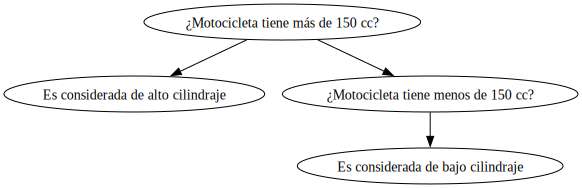

In [16]:
import graphviz
from IPython.display import display

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

class ArbolBinario:
    def __init__(self):
        self.raiz = None
        self.nodos = {}  # Diccionario para almacenar los nodos por valor

    def insertar(self, valor, izquierdo=None, derecho=None):
        if valor not in self.nodos:
            self.nodos[valor] = Nodo(valor)
        nodo_actual = self.nodos[valor]

        if self.raiz is None:
            self.raiz = nodo_actual

        if izquierdo:
            if izquierdo not in self.nodos:
                self.nodos[izquierdo] = Nodo(izquierdo)
            nodo_actual.izquierda = self.nodos[izquierdo]

        if derecho:
            if derecho not in self.nodos:
                self.nodos[derecho] = Nodo(derecho)
            nodo_actual.derecha = self.nodos[derecho]

    def bfs(self):
        if self.raiz is None:
            return []

        resultado = []
        cola = [self.raiz]
        while cola:
            nodo_actual = cola.pop(0)
            resultado.append(nodo_actual)
            if nodo_actual.izquierda:
                cola.append(nodo_actual.izquierda)
            if nodo_actual.derecha:
                cola.append(nodo_actual.derecha)

        return resultado

    def dfs(self):
        if self.raiz is None:
            return []

        def dfs_recursivo(nodo, resultado):
            if nodo:
                resultado.append(nodo)
                dfs_recursivo(nodo.izquierda, resultado)
                dfs_recursivo(nodo.derecha, resultado)

        resultado = []
        dfs_recursivo(self.raiz, resultado)
        return resultado

def construir_arbol():
    arbol = ArbolBinario()

    # Definir las reglas y construir el árbol
    arbol.insertar('¿Motocicleta tiene más de 150 cc?', 'Es considerada de alto cilindraje', '¿Motocicleta tiene menos de 150 cc?')
    arbol.insertar('¿Motocicleta tiene menos de 150 cc?', 'Es considerada de bajo cilindraje', None)
    
    arbol.insertar('¿Motocicleta tiene al menos 3 años de antigüedad?', 'Es usada', '¿Motocicleta tiene menos de 3 años de antigüedad?')
    arbol.insertar('¿Motocicleta tiene menos de 3 años de antigüedad?', 'Es nueva', '¿Motocicleta tiene menos de 500 km recorridos?')
    arbol.insertar('¿Motocicleta tiene menos de 500 km recorridos?', 'Es casi nueva', '¿Motocicleta tiene entre 500 y 1000 km recorridos?')
    arbol.insertar('¿Motocicleta tiene entre 500 y 1000 km recorridos?', 'Es seminueva', '¿Motocicleta tiene más de 1000 km recorridos?')
    arbol.insertar('¿Motocicleta tiene más de 1000 km recorridos?', 'Es usada', None)
    
    arbol.insertar('¿Motocicleta es deportiva?', '¿Tiene más de 500 cc?', '¿Tiene menos de 500 cc?')
    arbol.insertar('¿Tiene más de 500 cc?', 'Es de alto rendimiento', None)
    arbol.insertar('¿Tiene menos de 500 cc?', 'Es de bajo rendimiento', None)
    
    arbol.insertar('¿Motocicleta es chopper?', '¿Tiene más de 1000 cc?', None)
    arbol.insertar('¿Tiene más de 1000 cc?', 'Es de alto cilindraje', None)

    return arbol

def visualize_tree(arbol):
    dot = graphviz.Digraph(format='png')

    def traverse(nodo, parent=None):
        dot.node(str(id(nodo)), nodo.valor)
        if parent is not None:
            dot.edge(str(id(parent)), str(id(nodo)))
        if nodo.izquierda:
            traverse(nodo.izquierda, nodo)
        if nodo.derecha:
            traverse(nodo.derecha, nodo)

    traverse(arbol.raiz)
    display(dot)

# Crear y visualizar el árbol
arbol = construir_arbol()
visualize_tree(arbol)


In [14]:
# Función para construir árbol de expresiones
def construir_arbol_expresion(lexemas: List[Dict]) -> ArbolBinario:
    if not lexemas:
        return ArbolBinario()
    
    arbol = ArbolBinario()
    raiz = NodoExpresion(lexemas[0]["valor"], lexemas[0]["tipo"])
    arbol.insertar(raiz)
    pila = [raiz]
    idx = 1

    while pila and idx < len(lexemas):
        nodo_actual = pila.pop()

        if nodo_actual.tipo in [TipoToken.Y, TipoToken.O]:
            nodo_actual.izquierda = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
            arbol.insertar(nodo_actual.izquierda)
            pila.append(nodo_actual.izquierda)
            idx += 1

            if idx < len(lexemas) and lexemas[idx]["tipo"] in [TipoToken.P, TipoToken.S, TipoToken.N]:
                nodo_actual.derecha = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
                arbol.insertar(nodo_actual.derecha)
                pila.append(nodo_actual.derecha)
                idx += 1
        elif nodo_actual.tipo in [TipoToken.P, TipoToken.S, TipoToken.N]:
            nodo_actual.derecha = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
            arbol.insertar(nodo_actual.derecha)
            pila.append(nodo_actual.derecha)
            idx += 1

    return arbol

## Ejecución de analizadores

In [15]:
# Lógica principal

def main():
    # Lectura de reglas
    nombre_archivo = "reglas.txt"
    reglas = leer_reglas(nombre_archivo)

    # Convertir reglas en símbolos
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)

    # Construir tabla de reglas para mostrar
    tabla_reglas = construir_tabla_reglas(reglas_simbolos)

    # Frases para analizar
    frases = [
        
        "La motocicleta tiene más de 150 cc entonces es considerada de alto cilindraje",
        "Si la motocicleta tiene menos de 150 cc entonces es considerada de bajo cilindraje",
        "Si la motocicleta tiene al menos 3 años de antigüedad entonces es usada",
        "Si la motocicleta tiene menos de 3 años de antigüedad entonces es nueva",
        "Si la motocicleta tiene menos de 500 km recorridos entonces es casi nueva",
        "Si la motocicleta tiene entre 500 y 1000 km recorridos entonces es seminueva",
        "Si la motocicleta tiene más de 1000 km recorridos entonces es usada",
        "Si la motocicleta es deportiva y tiene más de 500 cc entonces es de alto rendimiento",
        "Si la motocicleta es deportiva y tiene menos de 500 cc entonces es de bajo rendimiento",
        "Si la motocicleta es chopper y tiene más de 1000 cc entonces es de alto cilindraje"
    ]

    # Crear árbol binario y construir árboles de expresión
    arbol = ArbolBinario()
    arboles_expresion = []

    for frase in frases:
        lexemas = analizador_lexico(frase)
        resultado_sintactico = analizador_sintactico(lexemas, reglas_simbolos)
        es_valido = analizador_semantico(lexemas)

        print(frase)
        if resultado_sintactico == EstadosAnalizador.FIN and es_valido:
            print("La frase es válida.")
            arbol_expresion = construir_arbol_expresion(lexemas)
            arboles_expresion.append(arbol_expresion)
        else:
            print("La frase no es válida.")

        print("Resultado sintáctico:", resultado_sintactico)
        print("Resultado semántico:", es_valido)
        print()

    # Mostrar tabla de reglas
    print("Tabla de Reglas:")
    for nombre_regla, regla_simbolos in tabla_reglas.items():
        print(nombre_regla)
        for simbolo in regla_simbolos:
            print(simbolo)
        print()

    # Mostrar árboles de expresión en BFS y DFS
    for i, arbol_expresion in enumerate(arboles_expresion, start=1):
        print(f"Árbol de Expresión {i} (BFS):")
        print(arbol_expresion.bfs())
        print()
        print(f"Árbol de Expresión {i} (DFS):")
        print(arbol_expresion.dfs())
        print()

if __name__ == "__main__":
    main()

Tu proposición está mal escrita
La motocicleta tiene más de 150 cc entonces es considerada de alto cilindraje
La frase no es válida.
Resultado sintáctico: EstadosAnalizador.ERROR
Resultado semántico: False

Si la motocicleta tiene menos de 150 cc entonces es considerada de bajo cilindraje
La frase es válida.
Resultado sintáctico: EstadosAnalizador.FIN
Resultado semántico: True

Si la motocicleta tiene al menos 3 años de antigüedad entonces es usada
La frase es válida.
Resultado sintáctico: EstadosAnalizador.FIN
Resultado semántico: True

Si la motocicleta tiene menos de 3 años de antigüedad entonces es nueva
La frase es válida.
Resultado sintáctico: EstadosAnalizador.FIN
Resultado semántico: True

Si la motocicleta tiene menos de 500 km recorridos entonces es casi nueva
La frase es válida.
Resultado sintáctico: EstadosAnalizador.FIN
Resultado semántico: True

Tu proposición está mal escrita
Si la motocicleta tiene entre 500 y 1000 km recorridos entonces es seminueva
La frase no es váli